In [15]:
import tensorflow as tf

from tensorflow import keras

from keras import backend as K

In [16]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import from tensorflow.keras


# The images are in a folder named 'shapes/training'
training_folder_name = 'Rock-Paper-Scissors-1/train'

# The folder contains a subfolder for each class of shape
classes = sorted(os.listdir(training_folder_name))
print(classes)

# Our source images are 128x128, but the base model we're going to use was trained with 224x224 images
pretrained_size = (224,224)
batch_size = 15

print("Getting Data...")
datagen = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.3) # hold back 30% of the images for validation

print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    training_folder_name,
    target_size=pretrained_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    training_folder_name,
    target_size=pretrained_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data


['paper', 'rock', 'scissors']
Getting Data...
Preparing training dataset...
Found 1764 images belonging to 3 classes.
Preparing validation dataset...
Found 756 images belonging to 3 classes.


In [17]:
from keras.applications.vgg16 import VGG16
#Load the base model, not including its final connected layer, and set the input shape to match our images
base_model = VGG16(weights='imagenet', include_top=False, input_shape=train_generator.image_shape)

In [18]:
from keras import Model
from keras.layers import Flatten, Dense
from keras import optimizers

# Freeze the already-trained layers in the base model
for layer in base_model.layers:
    layer.trainable = False # Freeeze Layers

# Create layers for classification of our images
x = base_model.output
x = Flatten()(x) 
prediction_layer = Dense(len(classes), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=prediction_layer)

# Compile the model
opt = optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer = opt,
              metrics=['accuracy'])

# Now print the full model, which will include the layers of the base model plus the dense layer we added
print(model.summary())

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │        75,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,789,955 (56.42 MB)

 Trainable params: 75,267 (294.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [19]:
# Train the model over 1 epoch using 15-image batches and using the validation holdout dataset for validation
num_epochs = 5
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)

Epoch 1/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 349s 3s/step - accuracy: 0.8677 - loss: 0.3906 - val_accuracy: 0.9907 - val_loss: 0.0462
Epoch 2/5
  1/117 ━━━━━━━━━━━━━━━━━━━━ 3:44 2s/step - accuracy: 1.0000 - loss: 0.0040

c:\Users\SLO\Documents\GitHub\IE-University\myenv312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


117/117 ━━━━━━━━━━━━━━━━━━━━ 107s 906ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 0.9907 - val_loss: 0.0460
Epoch 3/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 304s 3s/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9933 - val_loss: 0.0378
Epoch 4/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 89s 755ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.9933 - val_loss: 0.0373
Epoch 5/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 310s 3s/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9853 - val_loss: 0.0422


In [22]:
# Helper function to resize image
def resize_image(src_img, size=(128,128), bg_color="white"):
    from PIL import Image

    # rescale the image so the longest edge is the right size
    src_img.thumbnail(size, Image.LANCZOS)

    # Create a new image of the right shape
    new_image = Image.new("RGB", size, bg_color)

    # Paste the rescaled image onto the new background
    new_image.paste(src_img, (int((size[0] - src_img.size[0]) / 2), int((size[1] - src_img.size[1]) / 2)))

    # return the resized image
    return new_image

# Function to predict the class of an image
def predict_image(classifier, image_array):
    import numpy as np

    # We need to format the input to match the training data
    # The data generator loaded the values as floating point numbers
    # and normalized the pixel values, so...
    img_features = image_array.astype('float32')
    img_features /= 255

    # These are the classes our model can predict
    classnames = ['circle', 'square', 'triangle']

    # Predict the class of each input image
    predictions = classifier.predict(img_features)

    predicted_classes = []
    for prediction in predictions:
        # The prediction for each image is the probability for each class, e.g. [0.8, 0.1, 0.2]
        # So get the index of the highest probability
        class_idx = np.argmax(prediction)
        # And append the corresponding class name to the results
        predicted_classes.append(classnames[int(class_idx)])
    # Return the predictions
    return predicted_classes

print("Functions created - ready to use model for inference.")

Functions created - ready to use model for inference.


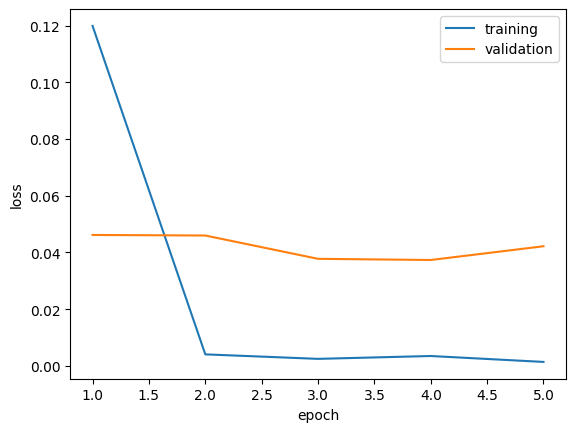

In [23]:
from matplotlib import pyplot as plt

# Get the number of validation loss values recorded during training
num_val_losses = len(history.history["val_loss"])
epoch_nums = range(1, num_val_losses + 1)

training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss[:num_val_losses]) # Plot training loss for the same number of epochs as validation loss
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [24]:
from keras.models import load_model

modelFileName = 'RPC-TF.keras'

model.save(modelFileName) # saves the trained model
print("Model saved.")

del model  # deletes the existing model variable

Model saved.


In [25]:
# Helper function to resize image
def resize_image(src_img, size=(128,128), bg_color="white"):
    from PIL import Image
    from PIL import ImageOps #Import ImageOps

    # rescale the image so the longest edge is the right size
    # src_img.thumbnail(size, Image.ANTIALIAS) # Deprecated
    src_img = ImageOps.contain(src_img, size, Image.Resampling.LANCZOS)  #Alternative method using ImageOps.contain


    # Create a new image of the right shape
    new_image = Image.new("RGB", size, bg_color)

    # Paste the rescaled image onto the new background
    new_image.paste(src_img, (int((size[0] - src_img.size[0]) / 2), int((size[1] - src_img.size[1]) / 2)))

    # return the resized image
    return new_image
# Function to predict the class of an image
def predict_image(classifier, image_array):
    import numpy as np

    # We need to format the input to match the training data
    # The data generator loaded the values as floating point numbers
    # and normalized the pixel values, so...
    img_features = image_array.astype('float32')
    img_features /= 255

    # These are the classes our model can predict
    classnames = ['paper', 'rock', 'scissors']

    # Predict the class of each input image
    predictions = classifier.predict(img_features)

    predicted_classes = []
    for prediction in predictions:
        # The prediction for each image is the probability for each class, e.g. [0.8, 0.1, 0.2]
        # So get the index of the highest probability
        class_idx = np.argmax(prediction)
        # And append the corresponding class name to the results
        predicted_classes.append(classnames[int(class_idx)])
    # Return the predictions
    return predicted_classes

print("Functions created - ready to use model for inference.")

Functions created - ready to use model for inference.


In [26]:
import os
from random import randint
import numpy as np
from PIL import Image
from keras.models import load_model
from matplotlib import pyplot as plt

# load the saved model
modelFileName = 'RPC-TF.keras'
model = load_model(modelFileName)

# Get the list of image files from all subdirectories
test_folder = 'Rock-Paper-Scissors-1/test'
test_image_files = []

for root, dirs, files in os.walk(test_folder):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            test_image_files.append(os.path.join(root, file))

# Empty array to store the images
image_arrays = []

size = (300, 300)
background_color = "white"

fig = plt.figure(figsize=(12, 8))

# Load and resize images
for file_path in test_image_files:
    img = Image.open(file_path)
    resized_img = np.array(resize_image(img, size, background_color))
    image_arrays.append(resized_img)


# Get predictions from the array of image arrays
# Note that the model expects an array of 1 or more images - just like the batches on which it was trained
predictions = predict_image(model, np.array(image_arrays))

# plot easch image with its corresponding prediction
images_per_row = 4
num_images = len(predictions)
num_rows = (num_images + images_per_row - 1) // images_per_row

fig = plt.figure(figsize=(images_per_row * 3, num_rows * 3))

for idx in range(num_images):
    ax = fig.add_subplot(num_rows, images_per_row, idx + 1)
    ax.imshow(image_arrays[idx])
    ax.set_title(predictions[idx])
    ax.axis('off')

plt.tight_layout()
plt.show()


ValueError: Input 0 of layer "functional_7" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(31, 300, 300, 3)

<Figure size 1200x800 with 0 Axes>